<a href="https://colab.research.google.com/github/JoleneShyu/Test-project/blob/main/%E9%81%B8%E5%9D%80XGBClassifier_testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://kknews.cc/zh-tw/code/5ll8rr3.*html

https://www.itread01.com/content/1545533828.html

https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

https://github.com/slundberg/shap

https://zhuanlan.zhihu.com/p/64799119

https://kknews.cc/zh-tw/news/grejk5m.html

In [113]:
import os
os.listdir() #左邊檔案裏要開放連結到我的雲端硬碟,os.listdir()才能抓到'drive',才能找到放在雲端硬碟的檔案路徑
os.listdir('drive/MyDrive/Colab Notebooks')

['「0320_precourse_python.ipynb」的副本',
 '「DataAnalysis.BM101007.ipynb',
 'v3-boston_house_price.ipynb',
 'v3-iris_classification.ipynb',
 '「Colab_Demo_設計你的神經網路.ipynb」-蔡炎龍',
 'Udemy-The Python Mega Course',
 'practice01.ipynb',
 'Untitled',
 'NearBy (1).py',
 'NearBy.py',
 'openstmp_fmChang.ipynb',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 '「OSM API測試_fmChang.ipynb」',
 'AIA Project']

In [114]:
# Import everything
import pandas as pd
import numpy as np


# Create a DataFrame
df = pd.read_excel('drive/MyDrive/Colab Notebooks/AIA Project/選址因子06012_J_data.xlsx')

# Print the head of the data. #df.head() will defaul to first 5 rows
df.head()
df

,業績分類,University,HighSchool,MainCompeteChain,Pharmacy,Attractions,Hospital,IndustyPark,PublicAgency,Transport,HyperMart,Convienence\n,FastFood,OtherCompeteChain\n,Gas/Incinerator,Trail/Substation,Markets
0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,3,0,0,0,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
106,1,0,0,1,2,0,0,0,0,0,1,1,0,3,1,0,1
107,1,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0
108,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [115]:
!pip install xgboost
!pip install shap  #沒有辦法直接import shap


In [116]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier

In [117]:
import xgboost
import matplotlib.pylab as pl
import shap


In [118]:
X = df.loc[:,df.columns!='業績分類']
y = df.loc[:,'業績分類']
print(X)
print(y)

     University  HighSchool  ...  Trail/Substation  Markets
0             2           0  ...                 0        0
1             0           0  ...                 0        0
2             0           0  ...                 0        0
3             0           0  ...                 0        0
4             0           0  ...                 0        2
..          ...         ...  ...               ...      ...
105           0           0  ...                 0        0
106           0           0  ...                 0        1
107           0           0  ...                 0        0
108           0           0  ...                 0        0
109           0           0  ...                 0        0

[110 rows x 16 columns]
0      0
1      0
2      0
3      0
4      0
      ..
105    1
106    1
107    1
108    1
109    1
Name: 業績分類, Length: 110, dtype: int64


In [119]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
preds=model.predict(X_test)
print(preds)

[1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0]


In [121]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[6 6]
 [1 9]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.60      0.90      0.72        10

    accuracy                           0.68        22
   macro avg       0.73      0.70      0.68        22
weighted avg       0.74      0.68      0.67        22



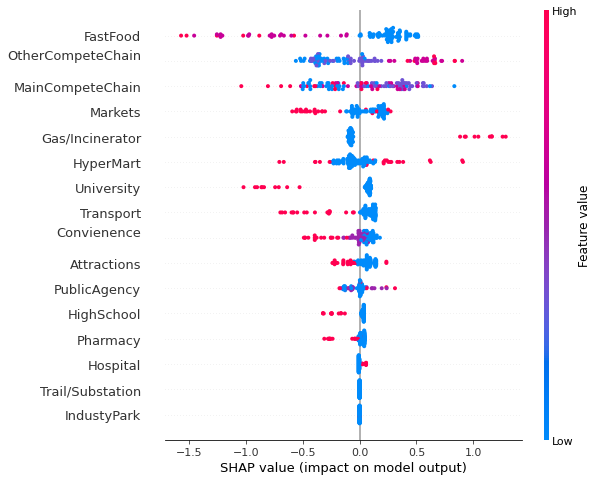

In [122]:
#Explain the model's predictions on the entire dataset
shap_values = shap.TreeExplainer(model).shap_values(X)

#SHAP Summary Plot
#The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of dying for a Cox proportional hazards model. We can see below that the primary risk factor for death according to the model is being old. The next most powerful indicator of death risk is being a man.
#This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk (such that a high white blood cell count leads to a high risk of death).
shap.summary_plot(shap_values,X)

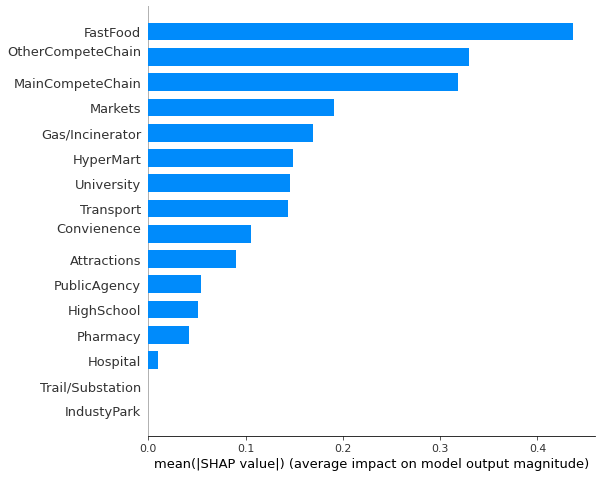

In [123]:
shap.summary_plot(shap_values,X,plot_type="bar")

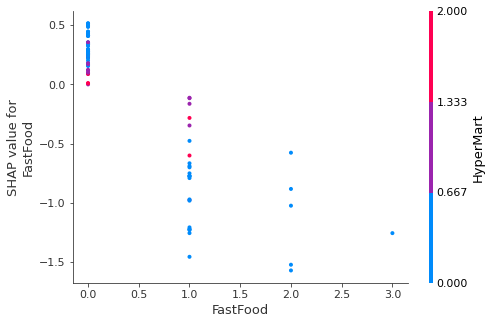

In [124]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below

shap.dependence_plot('FastFood',shap_values,X)

(110, 16, 16)


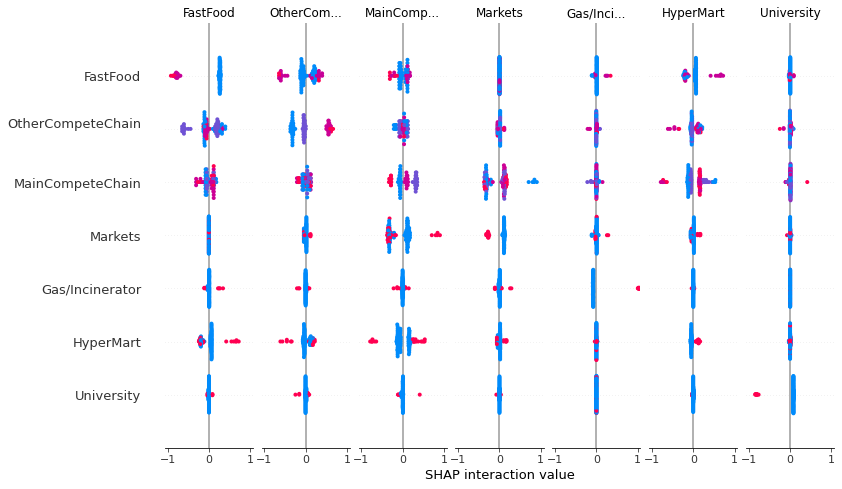

In [125]:
#Compute SHAP Interaction Values
#See the Tree SHAP paper for more details, but briefly, SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X)
#print(shap_interaction_values)

#SHAP Interaction Value Summary Plot
#A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.
print(shap_interaction_values.shape)
shap.summary_plot(shap_interaction_values,X)

In [126]:
tmp.shape

(16, 16)

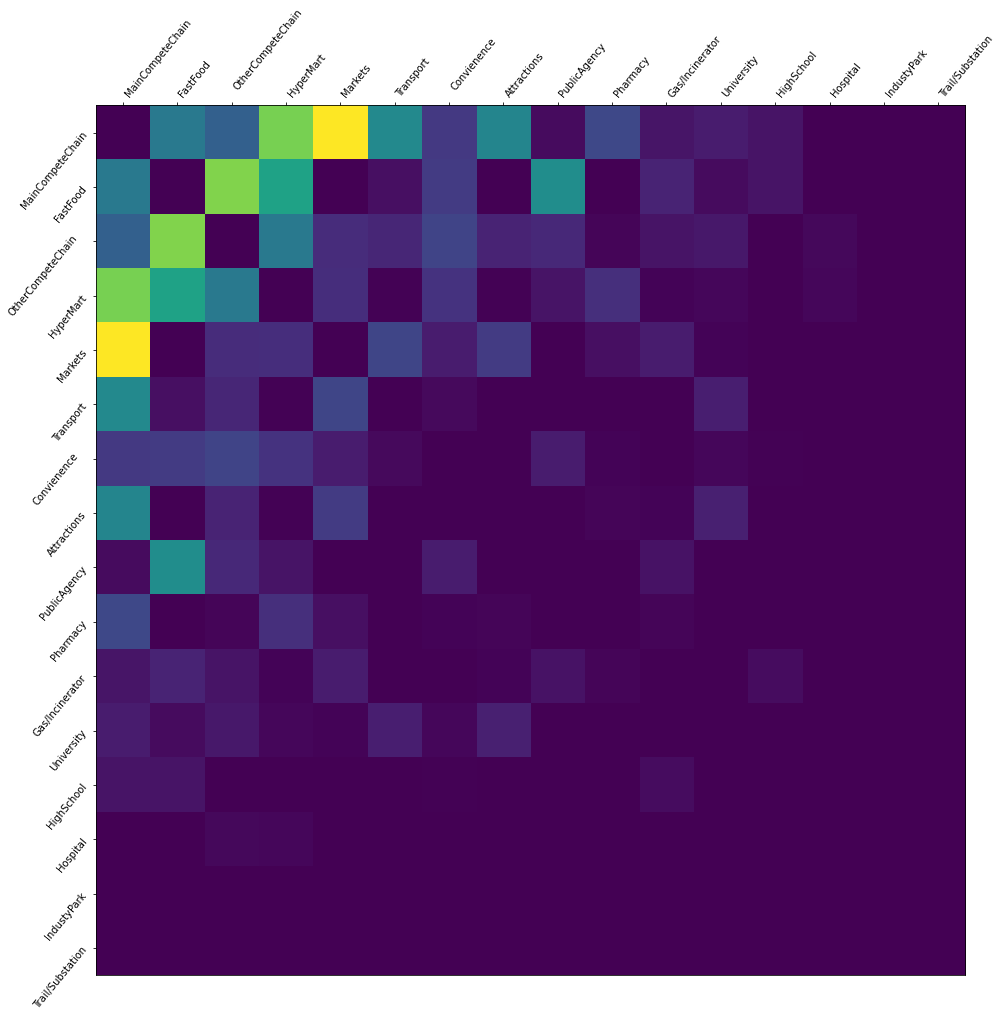

In [128]:
import matplotlib.pylab as pl
import numpy as np
tmp = np.abs(shap_interaction_values).sum(0)

for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(16,16))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()